In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stroke.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

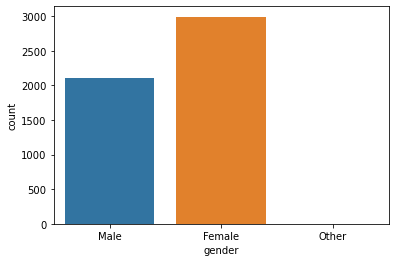

In [5]:
sns.countplot(df['gender'])

In [6]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

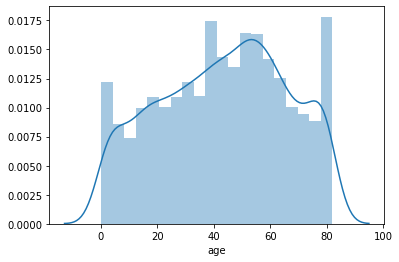

In [7]:
sns.distplot(df['age'])

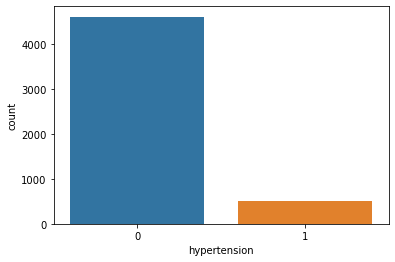

In [8]:
sns.countplot(df['hypertension'])

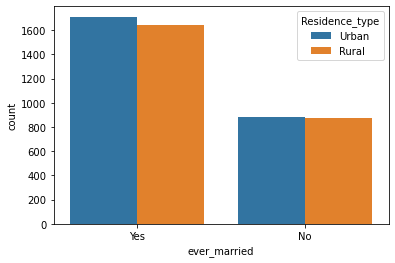

In [9]:
sns.countplot(df['ever_married'],hue=df['Residence_type'])

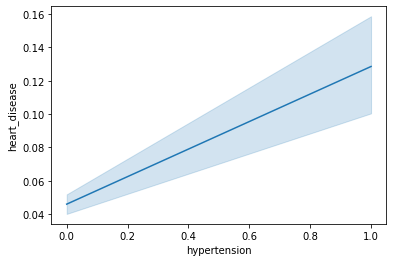

In [10]:
sns.lineplot(df['hypertension'],df['heart_disease'])

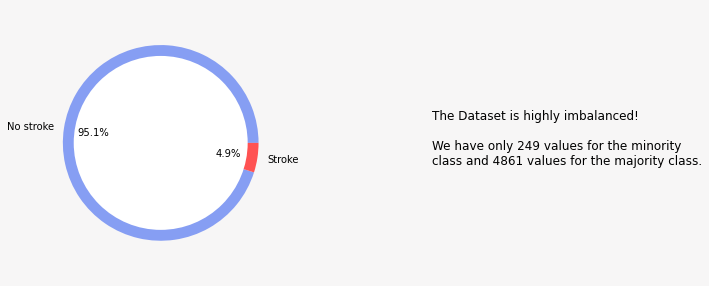

In [11]:
fig = plt.figure(figsize=(14,5),facecolor='#f7f6f6',)
axes = plt.subplot2grid((1,1),(0,0))

plt.pie(x = [df.stroke.value_counts()[0], df.stroke.value_counts()[1]],
        pctdistance=0.70,labels = ['No stroke','Stroke'], autopct='%1.1f%%',
        colors = ['#869ef3','#ff5252'], labeldistance= 1.1, radius = 0.9,)

centre_circle = plt.Circle((0,0),0.8,fc='white') 

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.text(2.5,-0.2,'The Dataset is highly imbalanced!\n\nWe have only 249 values for the minority \nclass and 4861 values for the majority class.', fontsize=12)
plt.show()


In [12]:
categorical_cols = df.columns[(df.dtypes  == 'object') | (df.dtypes ==  'int64') ].drop(['id', 'stroke'])
categorical_cols

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

In [13]:
numerical_cols = df.columns[df.dtypes == 'float64']
df[numerical_cols].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lr=LabelEncoder()

In [16]:
for i in categorical_cols:
    df[i]=lr.fit_transform(df[i])

In [17]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [18]:
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)


In [19]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
X = df.drop(['id', 'stroke'], axis =1)
y = df.stroke

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from imblearn.combine import SMOTETomek



In [23]:
sm=SMOTETomek(random_state=43)
x,y1=sm.fit_sample(X,y)

In [24]:
x.shape,y1.shape

((9618, 10), (9618,))

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3)

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
lrs=LogisticRegression(C= 10000.0, solver= 'lbfgs')

In [28]:
lrs.fit(x_train,y_train)

C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000.0)

In [29]:
pred=lrs.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
acc=accuracy_score(y_test,pred)

In [32]:
acc

0.814968814968815

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

In [34]:
lr = LogisticRegression()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
abc = AdaBoostClassifier()

In [35]:
models = [lr, knc, dtc, rfc, svc, xgb, abc]
models_name = ['Logistic Regression', "K Neighbor Classifier", "Decision Tree Classifier", 'Random Forest Classifier','Support Vector Classifier', 'XGBoost Classifier','ADABoost Classifier']

In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 1000)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('rfc',rfc))
estimator.append(('KNN',knc))
estimator.append(('adaboost',abc))
  
# Voting Classifier with hard voting
vote= VotingClassifier(estimators = estimator)


In [38]:
for clf in(lr,svc,dtc,rfc,knc,abc):
    clf.fit(x_train,y_train)
    ypred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,ypred))

C:\Users\kanch\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8156618156618156
SVC 0.7685377685377686
DecisionTreeClassifier 0.9206514206514207
RandomForestClassifier 0.9452529452529452
KNeighborsClassifier 0.8946638946638946
AdaBoostClassifier 0.8527373527373527


In [39]:
rf=RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
pred=rf.predict(x_test)

In [42]:
accuracy_score(y_test,pred)

0.9438669438669439

In [43]:
cm=confusion_matrix(y_test,pred)

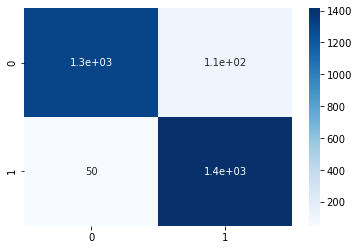

In [44]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1422
           1       0.93      0.97      0.95      1464

    accuracy                           0.94      2886
   macro avg       0.94      0.94      0.94      2886
weighted avg       0.94      0.94      0.94      2886



In [46]:
import pickle

In [47]:
file=open('stroke.pkl','wb')
pickle.dump(rf,file)
